## Dataset Description
This dataset contains a large number of segmented nuclei images. The images were acquired under a variety of conditions and vary in the cell type, magnification, and imaging modality (brightfield vs. fluorescence). The dataset is designed to challenge an algorithm's ability to generalize across these variations.

### Acknowledgement
https://www.kaggle.com/c/data-science-bowl-2018/data


In [1]:
from keras.models import load_model
from FCN_model import FCN_8

model_unet = load_model("./unet.hdf5", compile=False)
model_fcn = load_model("./fcn.hdf5", compile=False)

In [2]:
import glob
import cv2
import numpy as np
import tensorflow as tf
from FCN_model import FCN_8

Img=glob.glob('./TRAIN_224/images/*.*')[:100]
Mask=glob.glob('./TRAIN_224/masks/*.*')[:100]

I=[]
M=[]

for i in range(len(Img)):
    img=cv2.imread(Img[i])
    mask=cv2.imread(Mask[i],0)
    I.append(img)
    M.append(mask)
    

Image=np.array(I)
Images=Image/255.
Masks=np.array(M)
Masks= np.expand_dims(Masks, axis=3)

In [3]:
preds_unet = model_unet.predict(Images, verbose=1)
preds_unet_val = (preds_unet > 0.5).astype(np.uint8)

4/4 [==============================] - 4s 202ms/step


In [4]:
preds_fcn = model_fcn.predict(Image, verbose=1)
preds_fcn_val = (preds_fcn > 0.5).astype(np.uint8)

4/4 [==============================] - 8s 549ms/step


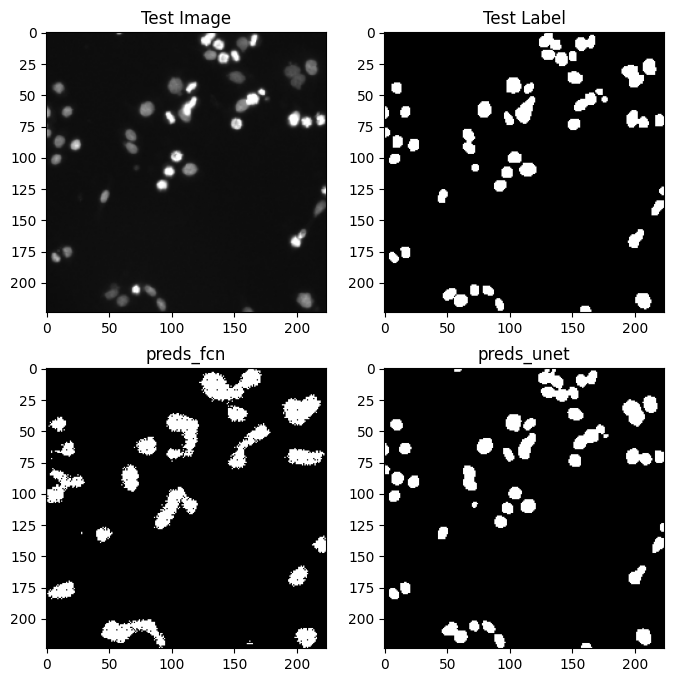

In [5]:
import random
import matplotlib.pyplot as plt

num=random.randint(0,len(Images))
plt.figure(figsize=(8, 8))
plt.subplot(221)
plt.title('Test Image')
plt.imshow(Images[num])
plt.subplot(222)
plt.title('Test Label')
plt.imshow(Masks[num,:,:,0], cmap='gray')
plt.subplot(223)
plt.title('preds_fcn')
plt.imshow(preds_fcn_val[num], cmap='gray')
plt.subplot(224)
plt.title('preds_unet')
plt.imshow(preds_unet_val[num], cmap='gray')